Prueba Practica
Se tiene los datos de las provincias contigadas por COVID-19, los mismo que se encuentran en el siguiente link (https://public.flourish.studio/visualisation/1631922/?utm_source=showcase&utm_campaign=visualisation/1631922), estos datos estan disponibles en el Avac dentro del apartado 
PRUEBA -  BRYAM CHIMBO


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

#DATOS
url = 'Casos covid por provincias.xlsx'

df = pd.read_excel(url)
df

,Provincia,16/3/2020,17/3/2020,18/3/2020,19/3/2020,20/3/2020,21/3/2020,22/3/2020,23/3/2020,24/3/2020,...,13/4/2020,14/4/2020,15/4/2020,16/4/2020,17/4/2020,18/4/2020,19/4/2020,20/4/2020,21/04/2020,22/04/2020
0,Azuay,1,5,5,14,18,19,19,23,28,...,182,192,200,205,207,217,223,232,247,273
1,Bolivar,0,0,2,2,4,5,8,9,9,...,33,33,33,39,39,45,49,54,55,59
2,Cañar,0,0,0,3,3,3,4,5,7,...,100,104,105,117,118,125,137,145,149,162
3,Carchi,0,0,0,0,0,0,0,0,0,...,25,26,26,26,26,28,33,35,35,35
4,Chimborazo,0,0,0,2,3,4,9,9,11,...,85,86,90,99,105,108,112,116,121,124
5,Cotopaxi,0,0,0,0,0,0,0,1,1,...,42,43,45,46,50,51,54,57,57,59
6,El Oro,0,1,1,1,2,2,6,9,14,...,160,166,183,193,207,247,257,266,276,289
7,Esmeraldas,0,0,0,0,0,2,2,3,3,...,38,41,44,53,85,86,89,102,102,104
8,Galápagos,0,0,0,0,0,0,0,0,4,...,11,12,11,11,42,53,54,54,54,54
9,Guayas,37,81,128,187,318,397,607,769,826,...,5395,5417,5551,5754,5777,6150,6446,6921,7108,7391


In [3]:
#Filtro de datos de la provincia del Oro
df = df[df['Provincia'].isin(['El Oro'])] 
df


,Provincia,16/3/2020,17/3/2020,18/3/2020,19/3/2020,20/3/2020,21/3/2020,22/3/2020,23/3/2020,24/3/2020,...,13/4/2020,14/4/2020,15/4/2020,16/4/2020,17/4/2020,18/4/2020,19/4/2020,20/4/2020,21/04/2020,22/04/2020
6,El Oro,0,1,1,1,2,2,6,9,14,...,160,166,183,193,207,247,257,266,276,289


In [4]:
url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
#Generamos los datos segun la provincia asignada desde la fecha 16/3/2020
provincia= df[df['Provincia'] == "El Oro"]  
casos=provincia.iloc[0].loc["16/3/2020":]
casos

16/3/2020       0
17/3/2020       1
18/3/2020       1
19/3/2020       1
20/3/2020       2
21/3/2020       2
22/3/2020       6
23/3/2020       9
24/3/2020      14
25/3/2020      17
26/3/2020      20
27/3/2020      21
28/3/2020      23
29/3/2020      25
30/3/2020      30
31/3/2020      34
1/4/2020       52
2/4/2020       56
3/4/2020       56
4/4/2020       56
5/4/2020       56
6/4/2020       58
7/4/2020       58
8/4/2020       82
9/4/2020       97
10/4/2020     137
11/4/2020     149
12/4/2020     150
13/4/2020     160
14/4/2020     166
15/4/2020     183
16/4/2020     193
17/4/2020     207
18/4/2020     247
19/4/2020     257
20/4/2020     266
21/04/2020    276
22/04/2020    289
Name: 6, dtype: object

Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

------------------------------------------------Modelo Lineal--------------------------------------------------------

In [7]:
# Implementar modelo Lineal
x= range(1,len(casos)+1)
y=casos

# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
#Vamos a comprobar:
x_prediccion=[x[0]]
y_prediccion=[y[0]]
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 7 que seria 46,
# según nuestro modelo, hacemos:
for i in range (len(y),46):
    x_prediccion.append(i)
    y_prediccion.append(float(regr.predict([[i]])))
print(x_prediccion,y_prediccion)


Coefficients: 
 [7.80118175]
Independent term: 
 -61.149359886201964
[1, 38, 39, 40, 41, 42, 43, 44, 45] [0, 235.29554655870442, 243.09672830725458, 250.89791005580474, 258.6990918043549, 266.50027355290507, 274.30145530145523, 282.1026370500054, 289.9038187985556]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


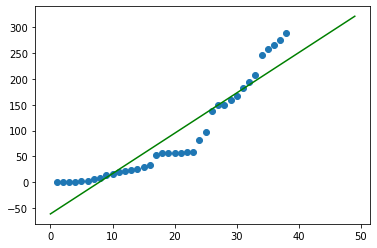

In [8]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(0, 50))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

------------------------------------------------Modelo Logistico--------------------------------------------------------

In [9]:
# Implementar modelo Logistico
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-125.74235581,   79.97818386]), array([[1099.48087081, -368.7837416 ],
       [-368.7837416 ,  136.09815815]]))


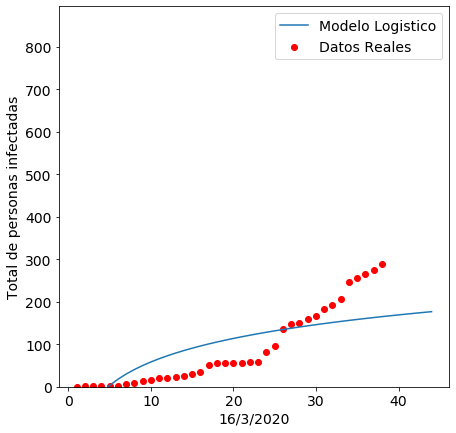

In [10]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).

------------------------------------------------Modelo Exponencial--------------------------------------------------------

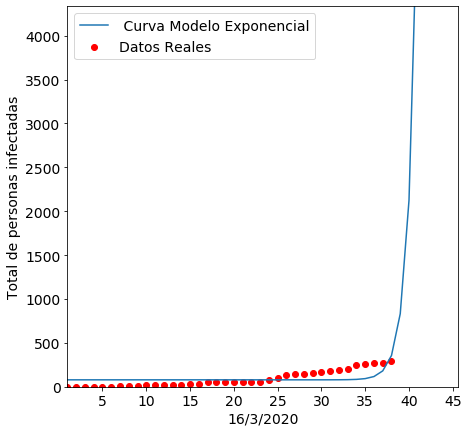

In [11]:
# Implementar modelo exponencial
def modeloExponencial(x,a,b):
    return a+b*np.exp(x)
exp_fit = curve_fit(modeloExponencial,x,y) #Extraemos los valores de los paramatros
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modeloExponencial(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label=" Curva Modelo Exponencial" )
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y),max(y)*15)) # Definir los limites de Y
plt.xlim((min(x),max(x)*1.2))# Definir los limites de X
plt.show()

(1, 38)

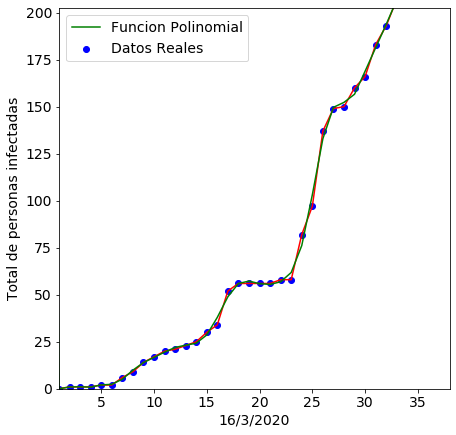

In [12]:
x=list(range(1,len(casos)+1))
y=list(casos)
datos = {}
# Predecir 7 dias mas
for dias in range(8,46):
  z = np.polyfit(x, y, dias, full=True)
  datos[dias] = z
plt.plot(x, y, 'r')
# RANGO
xp=np.array(range(0,600))
# fUNCION POLINOMIAL
for dt, escala in datos.items():
  coefs, error, *_ = escala
  p = np.poly1d(coefs)
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.plot(xp, p(xp), "-", label="Funcion Polinomial",color="green")
plt.legend()
plt.xlabel("16/3/2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*(-7),max(y)*0.7)) # Definir los limites de Y
plt.xlim((min(x)*(1),max(x)*1))# Definir los limites de X

Calcular y generar el modelo SIR, con este dato obtener el betta y gamma, para ello solo emplear los datos de casos confirmados. Para ello se debe tomar la tasa de repoduccion efectiva que se calcula como

------------------------------------------------Modelo SIR--------------------------------------------------------

Resultado Beta: 
0.006394752718231906
Resultado Gamma: 
0.001
Resultado R0: 
6.394752718231906
Resultado RE: 
1598688.1795579765


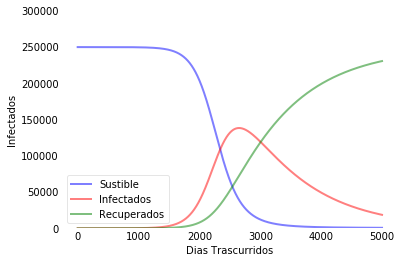

In [6]:
import numpy as np 
from datetime import datetime,timedelta
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import pandas as pd,requests,sys,numpy as np, matplotlib, math, matplotlib.pyplot as plt,scipy
from scipy.integrate import solve_ivp

from scipy.optimize import minimize
from IPython.display import display

x=list(range(1,len(casos)+1))
y=list(casos)
#La función de pérdida
def loss(point, data, rf, s_0, i_0, r_0):
     
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - rf)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

data = (y)

# Total de la poblacion
N = 250000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados en el ORO
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
optimal = minimize(loss, [0.0001, 0.0001], args=(data, 0, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])
beta, gamma = optimal.x

beta *= 10000
gamma *= 100000 

print('Resultado Beta: ' )
print(beta)
print('Resultado Gamma: ')
print(gamma)
print("Resultado R0: ")
print(beta/gamma)
print("Resultado RE: ")
print((beta/gamma)*250000)
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0,5000, 5000)
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


fig = plt.figure(facecolor='w')

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Dias Trascurridos')
ax.set_ylabel('Infectados')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Obtener el Re para generar una simulacion de epidimiologica y su grado de difusion, para ello obtener el numero de muertos,
recuperados e infectados.

------------------------------------------------------SIMULACION-----------------------------------------------------------

In [7]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = ((beta/gamma)*250000) # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 100 #Numero de filas
nb_cols = 100 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((1000,800),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (300, 30, 300, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 4, 100 + y * 12 + 4), 2)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 2, 100 + y * 12 + 3, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


error: video system not initialized

RESULTADO
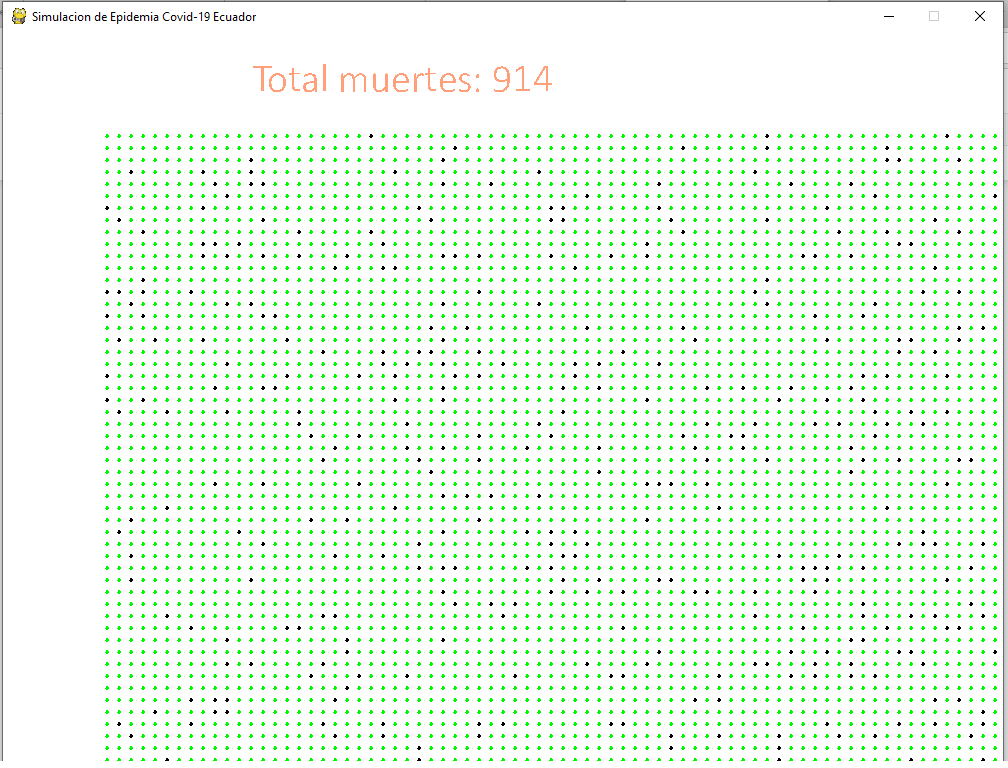

Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
•	Cual tiene una mejor prediccion

En base a los modelos generados sabemos que el que mejor prediccion posee es el modelo polinomial ya que en este los puntos se asercan mejor a la curva de prediccion del numero de casos confirmados donde la relación se modela como una función polinomial de orden n esto quiere decir que pueden tener de diferentes exponenciales o grados y se deben ir probando para la curva de prediccion.

•	Ventajas y desventajas de los modelos.
1-El modelo Lineal
Una ventaja princial de este modelo es que su estructura es tan sencilla que se puede comprender rapidamente, ya que solo consiste en dibujar una recta de u conjunto de datos que estemos utilizando.Mientras que una desventaja de este cabria en los cuando intentamos trabajar con datos con relaciones mas complejas.

2-El modelo Logistico
El modelo logistio tiene la ventaja de poder describir el crecimiento que una infección puede tener en una poblacion aun su curva no es del todo acertada con los datos obtenidos lo cual es una desventaja que basicamente los puntos no estan del todo simetricos con la curva de prediccion.

3- El modelo Exponencial
E modelo exponecial tiene la ventaja de describir un crecimiento de infección imparable es decir si un paciente infecta a 2 pacientes por día, después de 1 día tendremos 2 infecciones y asi va susecivamente el modelo con una rediccion por dias y susectibles. En cuanto a sus desventajas contituiria su complejidad de desarrollar para obtener resultados.

4-El modelo Polinomial
Su principal ventaja se basa en que es el modelo que mejor tiene la capacidad de predeccir la curva de infeccion donde la relación se modela como una función polinomial de orden n, lo que nos dic que puede tener exponenciales o grados, una desventaja de este modelo seria que siempre se requiere elegir el grado correcto del polinomio para producir una buena relación.
